#Loading the Data

In [1]:
# Import necessary libraries
import pandas as pd

# Load the Titanic training and test datasets
titanic_train = pd.read_csv('titanic_train.csv')  # Replace with actual file path if needed
titanic_test = pd.read_csv('titanic_test.csv')    # Replace with actual file path if needed

# Display the first few rows of each to check the data structure
print("Training Data:")
titanic_train.head()

print("\nTest Data:")
titanic_test.head()


Training Data:

Test Data:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#Exploratory Data Analysis

In [2]:
# Inspect the structure and basic information of the training dataset
print("Training Data Information:")
titanic_train.info()

# Display summary statistics for numerical columns
print("\nSummary Statistics (Numerical):")
titanic_train.describe()

# Display summary statistics for categorical columns
print("\nSummary Statistics (Categorical):")
titanic_train.describe(include=['object'])


Training Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Summary Statistics (Numerical):

Summary Statistics (Categorical):


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


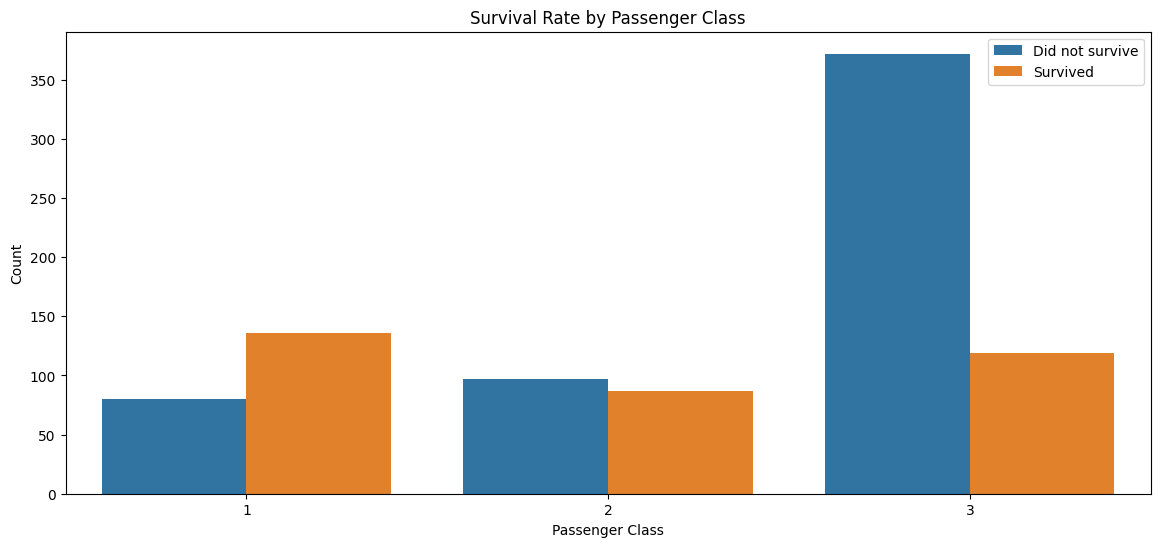

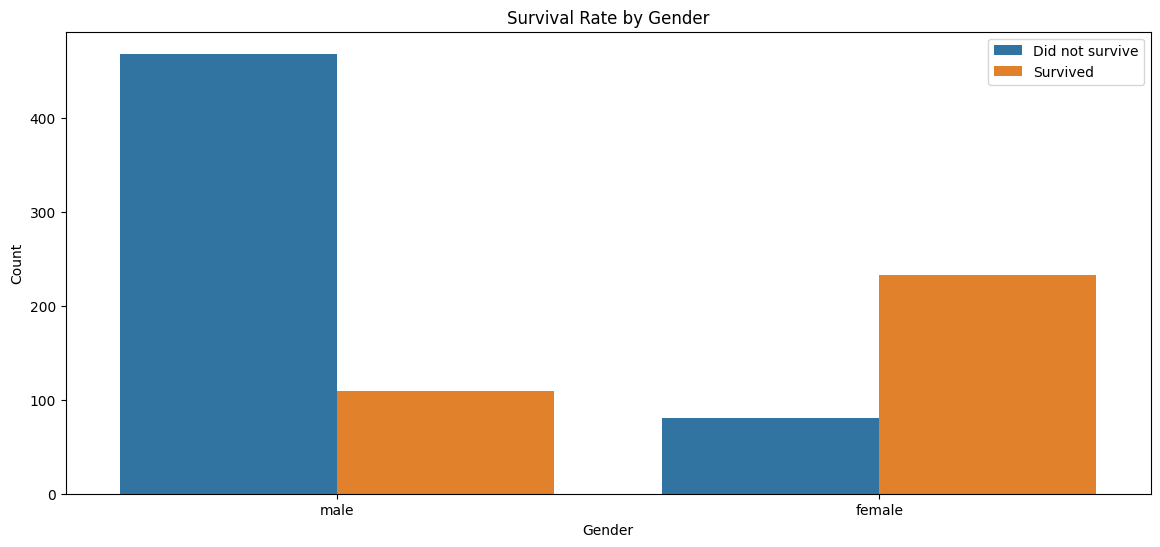

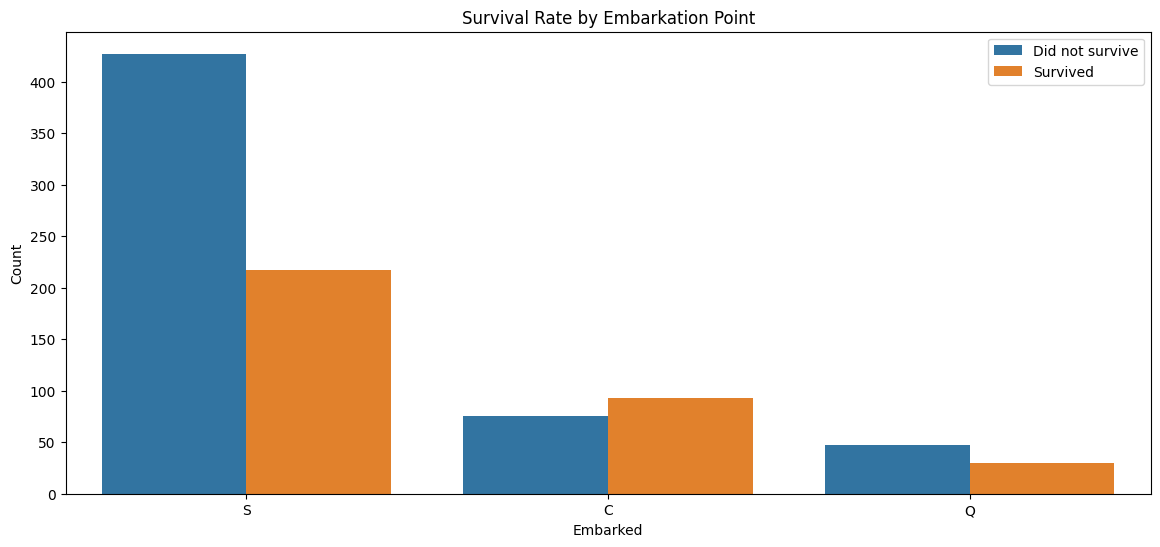

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size for better readability
plt.figure(figsize=(14, 6))

# Survival rate by Pclass
sns.countplot(data=titanic_train, x='Pclass', hue='Survived')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'])
plt.show()

# Survival rate by Sex
plt.figure(figsize=(14, 6))
sns.countplot(data=titanic_train, x='Sex', hue='Survived')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'])
plt.show()

# Survival rate by Embarked
plt.figure(figsize=(14, 6))
sns.countplot(data=titanic_train, x='Embarked', hue='Survived')
plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'])
plt.show()


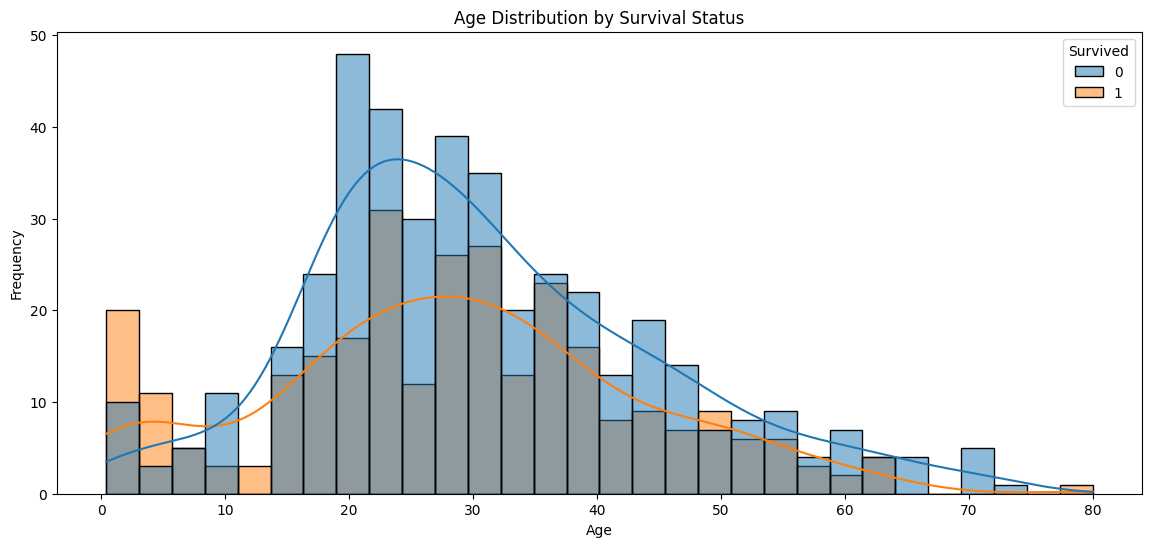

In [4]:
plt.figure(figsize=(14, 6))
sns.histplot(data=titanic_train, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


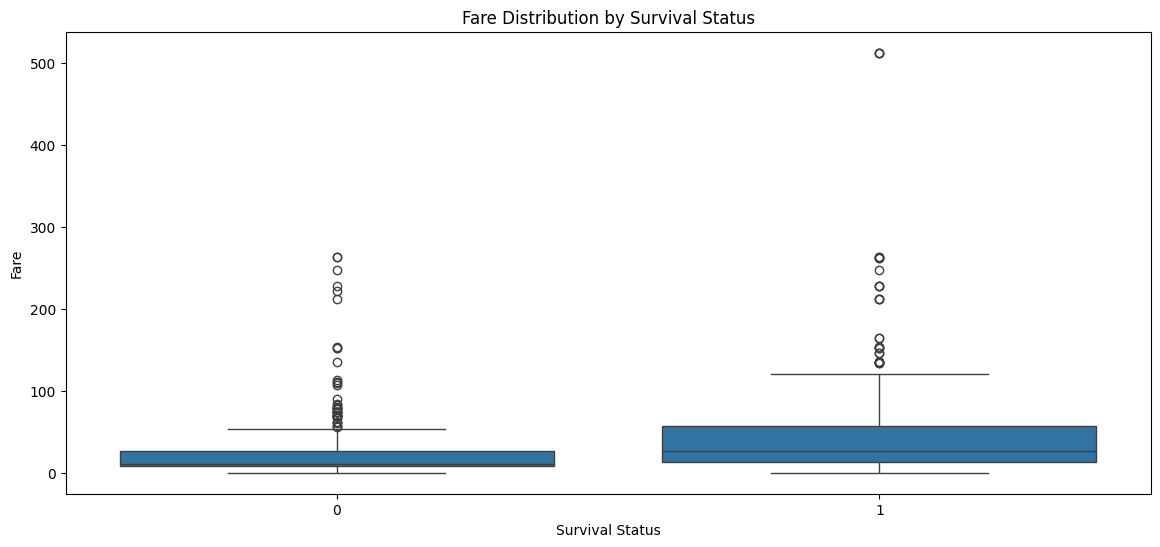

In [5]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=titanic_train, x='Survived', y='Fare')
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Fare')
plt.show()


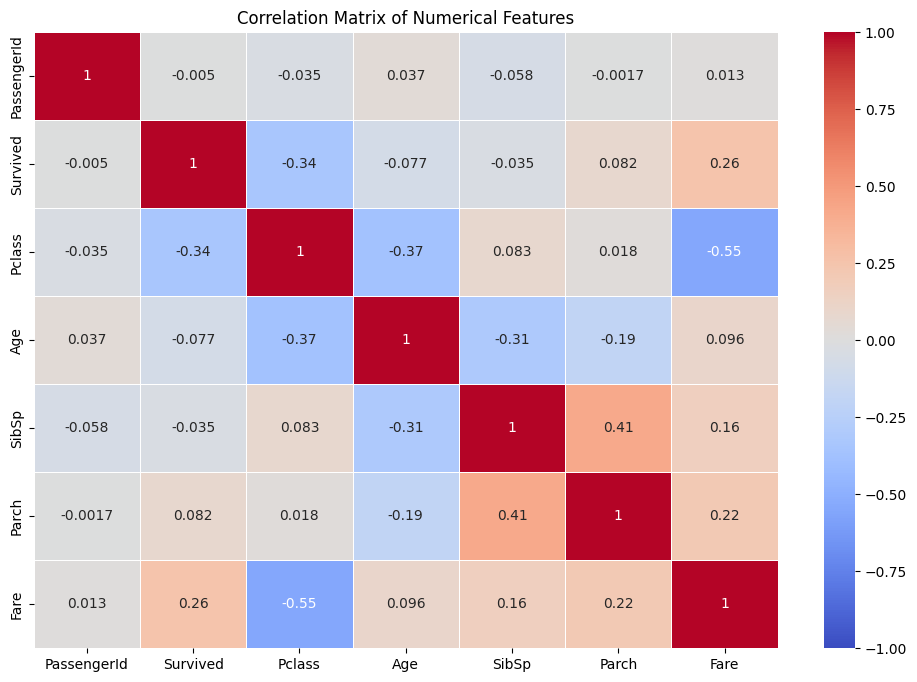

In [6]:
import numpy as np  # Import numpy at the top

# Select only numeric columns for the correlation matrix
numeric_cols = titanic_train.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#Data Cleaning and Preprocessing

In [7]:
# Check for missing values
print("Missing values in each column:")
print(titanic_train.isnull().sum())

# Fill missing 'Age' with the median
titanic_train['Age'].fillna(titanic_train['Age'].median(), inplace=True)

# Fill missing 'Embarked' with the most common value
titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' due to a high number of missing values (optional step)
titanic_train.drop('Cabin', axis=1, inplace=True)


Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


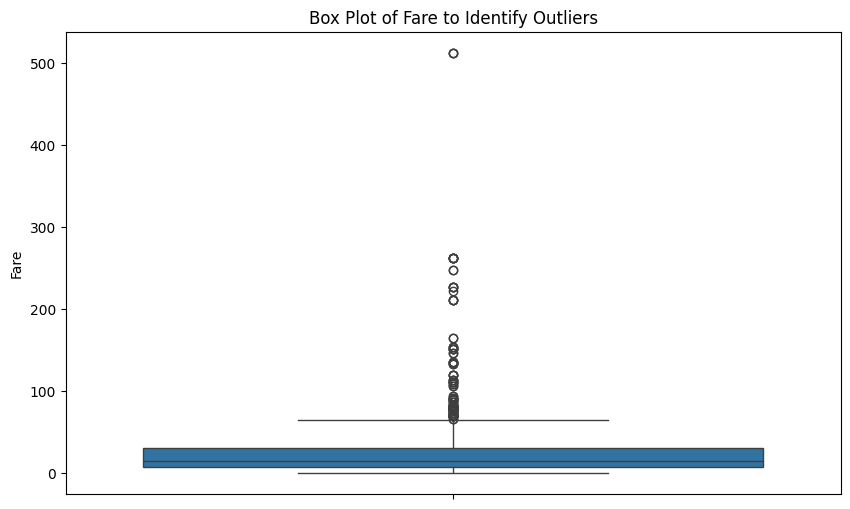

In [8]:
# Plot a box plot for 'Fare' to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic_train, y='Fare')
plt.title('Box Plot of Fare to Identify Outliers')
plt.show()

# Cap the outliers if necessary (e.g., set a threshold at the 95th percentile)
fare_threshold = titanic_train['Fare'].quantile(0.95)
titanic_train.loc[titanic_train['Fare'] > fare_threshold, 'Fare'] = fare_threshold


In [9]:
# Convert 'Sex' to numeric (0 = male, 1 = female)
titanic_train['Sex'] = titanic_train['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to dummy/indicator variables
embarked_dummies = pd.get_dummies(titanic_train['Embarked'], prefix='Embarked')
titanic_train = pd.concat([titanic_train, embarked_dummies], axis=1)
titanic_train.drop('Embarked', axis=1, inplace=True)


#Feature Engineering and Selection

In [10]:
# Create a 'FamilySize' feature by combining 'SibSp' and 'Parch'
titanic_train['FamilySize'] = titanic_train['SibSp'] + titanic_train['Parch'] + 1  # +1 to include the passenger

# Create a 'IsAlone' feature (1 if the passenger is alone, 0 otherwise)
titanic_train['IsAlone'] = (titanic_train['FamilySize'] == 1).astype(int)

# Preview the dataset with the new features
titanic_train[['FamilySize', 'IsAlone']].head()


,FamilySize,IsAlone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


Feature Importances:
Fare          0.261101
Age           0.256889
Sex           0.254108
Pclass        0.076946
FamilySize    0.045757
SibSp         0.030355
Parch         0.025689
Embarked_S    0.014374
Embarked_C    0.014011
IsAlone       0.012186
Embarked_Q    0.008583
dtype: float64


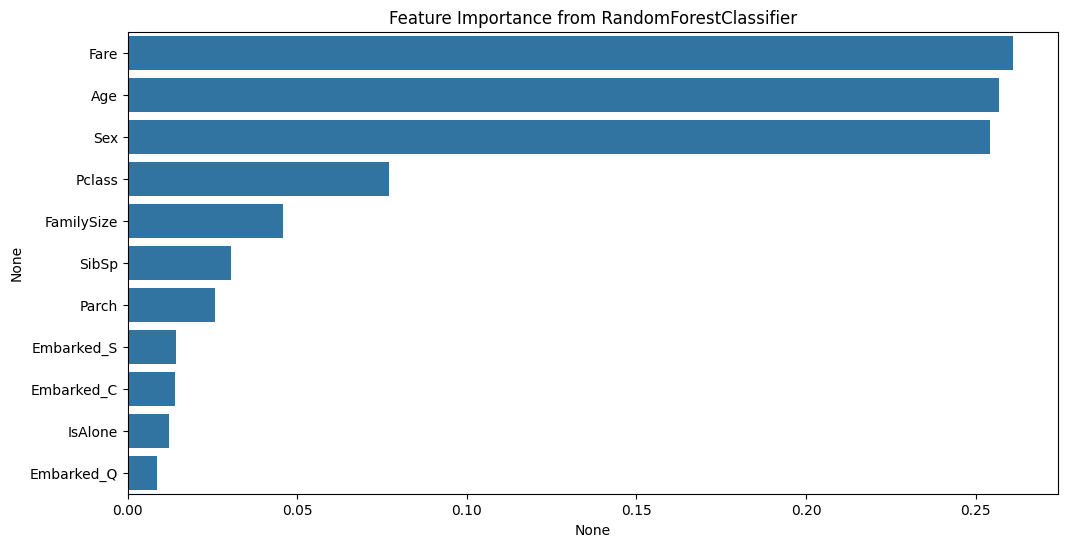

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Prepare data for feature importance analysis
X = titanic_train.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)  # Drop non-informative columns
y = titanic_train['Survived']

# Train a basic RandomForestClassifier to get feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Display feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:")
print(feature_importances)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance from RandomForestClassifier')
plt.show()


#Model Building and Auto ML Integration

In [13]:
!pip uninstall -y scipy
!pip install scipy==1.7.3

Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 79.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.20 requires scipy>=1.10.0, but you have scipy 1.7.3 which is incompatible.
arviz 0.20.0 requires numpy>=1.23.0, but you have numpy 1.22.4 which is incompatible.
arviz 0.20.0 requires scipy>=1.9.0, but you

In [15]:
import scipy
import numpy as np

# Create a mock interp function to replace `scipy.interp`
scipy.interp = np.interp


In [16]:
# Install AutoVIML if not already installed
!pip install autoviml

# Import AutoVIML
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.800. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            GPU_flag=False, verbose=1)
            

Imported Auto_NLP version: 0.1.01.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [20]:
!pip install --upgrade autoviml

In [21]:
# Check the structure of the train_data DataFrame
print("Columns in train_data:", train_data.columns)
print("First few rows:\n", train_data.head())


Columns in train_data: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'FamilySize', 'IsAlone'],
      dtype='object')
First few rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0 22.00      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1 38.00      1   
2                               Heikkinen, Miss. Laina    1 26.00      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1 35.00      1   
4                             Allen, Mr. William Henry    0 35.00      0   

   Parch            Ticket  Fare  Embarked_C  Embarked_Q  Embarked_S  \
0      0

In [17]:
# Prepare data for AutoVIML
X = titanic_train.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
y = titanic_train['Survived']


##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (891, 15)
    Training Set Memory Usage = 0.08 MB
Single_Label Target: ['Survived']

################ Binary_Classification VISUALIZATION Started #####################
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
           0:     549  ->   61.6%
           1:     342  ->   38.4%
    Target Survived is already numeric. No transformation done.
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    14 Predictors classified...
    1 variables removed since they were ID or low-information variables
#######################

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

Auto NLP processing on NLP Column: Name
Shape of Train Data: 891 rows
    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for Name column
    Faster text processing using clean_text function, since top_num_features is below 300
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 2 seconds
Train data Text cleaning completed. Time taken = 2 seconds

For target = Survived

    For class = 0
Top 200 n-grams
: ['miss', 'william', 'john', 'henry', 'james', 'george', 'charles', 'thomas', 'edward', 'master', 'richard', 'johan', 'joseph', 'alfred', 'frederick', 'arthur', 'samuel', 'alexander', 'david', 'peter', 'martin', 'ernest', 'leonard', 'sage', 'j', 'robert', 'mary', 'van', 'jr', 'panula', 'rev', 'daniel', 'andersson', 'patrick', 'victor', 'hansen', 'andrew', 'h', 'skoog', 'karl', 'maria', 'goodwin', 'gustaf', 'harry', 'francis', 'elia', 'rice', 'han', 'olsen', 'frank',

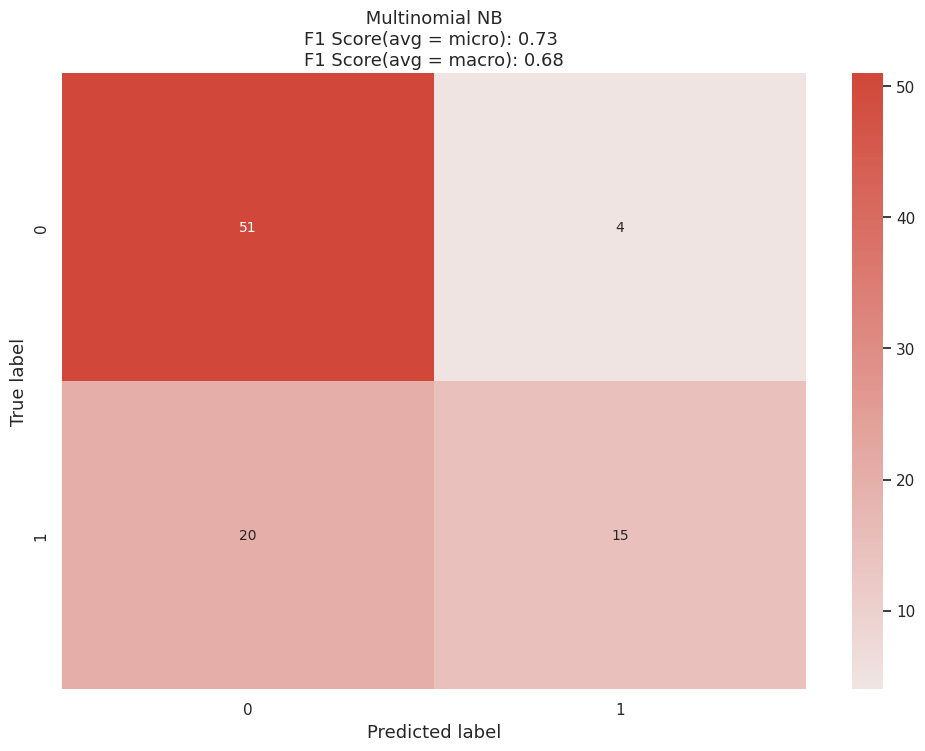

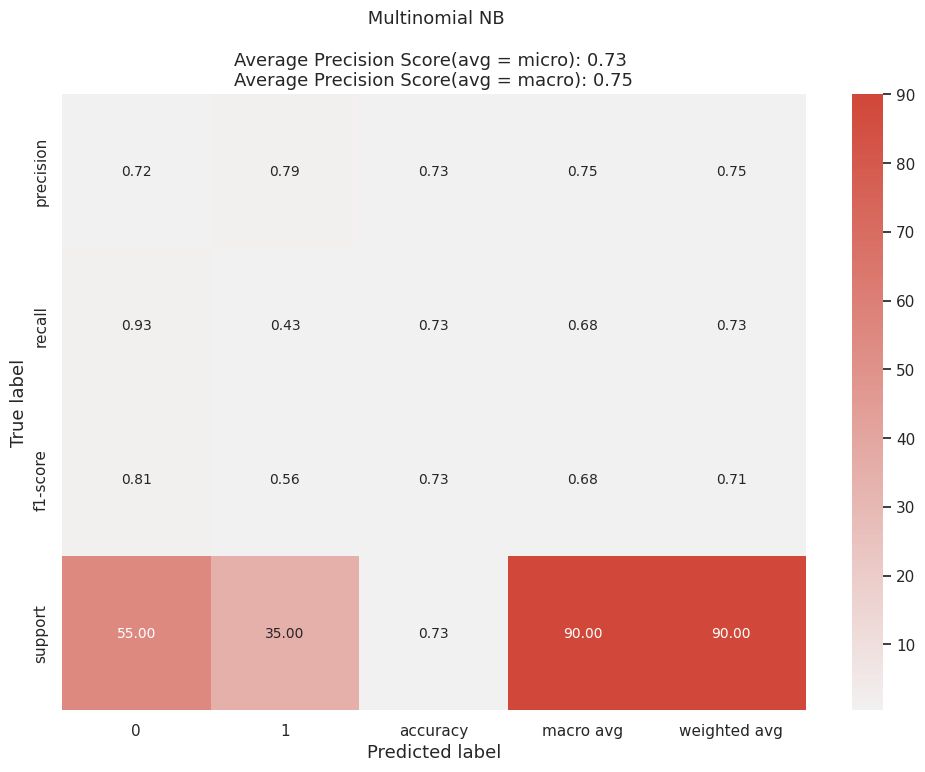

  Now transforming Train data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 2 seconds
###    AFTER BEST NLP TRANSFORMER SELECTED, NOW ENRICH TEXT DATA  ##############
    Now transforming NLP_column for train and test data using best vectorizer...
Reducing dimensions from 435 term-matrix to 20 dimensions using TruncatedSVD...
    Reduced dimensional array shape to (891, 20)
    Time Taken for Truncated SVD = 0 seconds
TruncatedSVD Data Frame size = (891, 20)
Creating word clusters using term matrix of shape: (891, 20) from Train data set...
    Running k-means on NLP token matrix to create 2 word clusters.
    Created one new column: Name_word_cluster_Name using KMeans_Clusters on NLP transformed columns...
    Time Taken for creating word cluster labels  = 1 seconds
Using Vader to calculate objectivity and pos-neg-neutral scores
    Created 4 new columns using SentinmentIntensityAnalyze

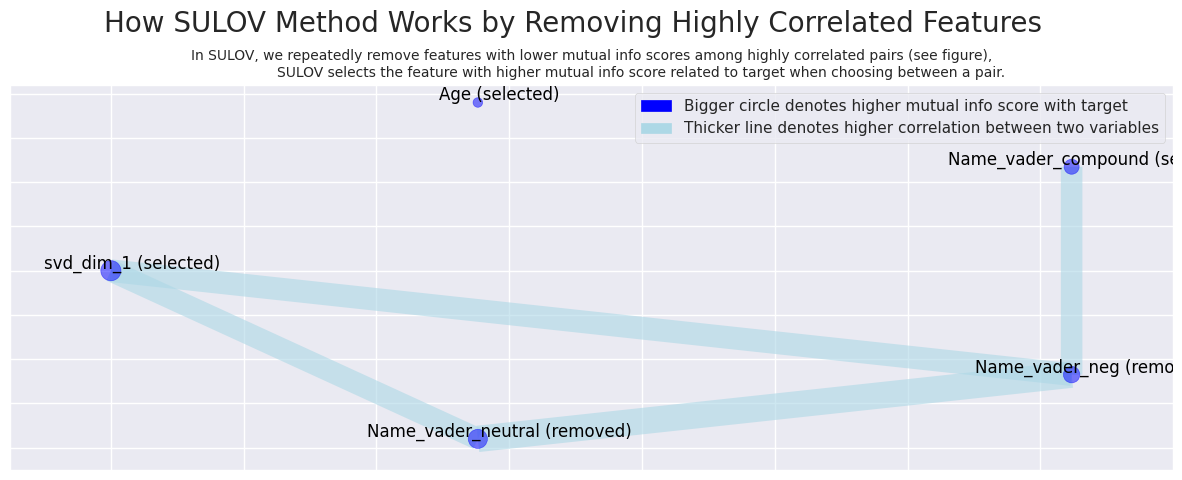

Splitting selected features into float and categorical (integer) variables:
    (24) float variables ...
    (21) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 45 
    Finding Important Features using Boosted Trees algorithm...
        using 45 variables...
        using 36 variables...
        using 27 variables...
        using 18 variables...
        using 9 variables...
Found 23 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  801 , CV rows =  90
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Performing MinMax scaling o

In [22]:
model = Auto_ViML(
    train=train_data,  # Pass the complete DataFrame
    target='Survived',  # Target column
    test='',  # No separate test set
    sample_submission='',
    hyper_param='RS',  # Random search for hyperparameters
    feature_reduction=True,
    scoring_parameter='accuracy'
)


In [27]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X = train_data.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
y = train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8156424581005587

Confusion Matrix:
 [[90 15]
 [18 56]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



#Model Improvement and Hyperparameter Tuning

In [29]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,
    scoring='accuracy'
)

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Display the best parameters and the best accuracy score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)


Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy Score: 0.8244512995071447


In [30]:
# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_best = best_model.predict(X_test)
print("Accuracy with Tuned Model:", accuracy_score(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Accuracy with Tuned Model: 0.8435754189944135

Confusion Matrix:
 [[96  9]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       105
           1       0.86      0.74      0.80        74

    accuracy                           0.84       179
   macro avg       0.85      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



#Clustering and Anomaly Detection

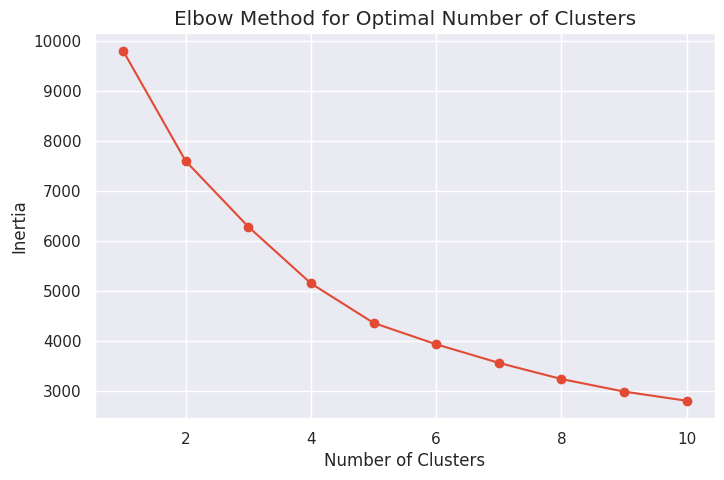

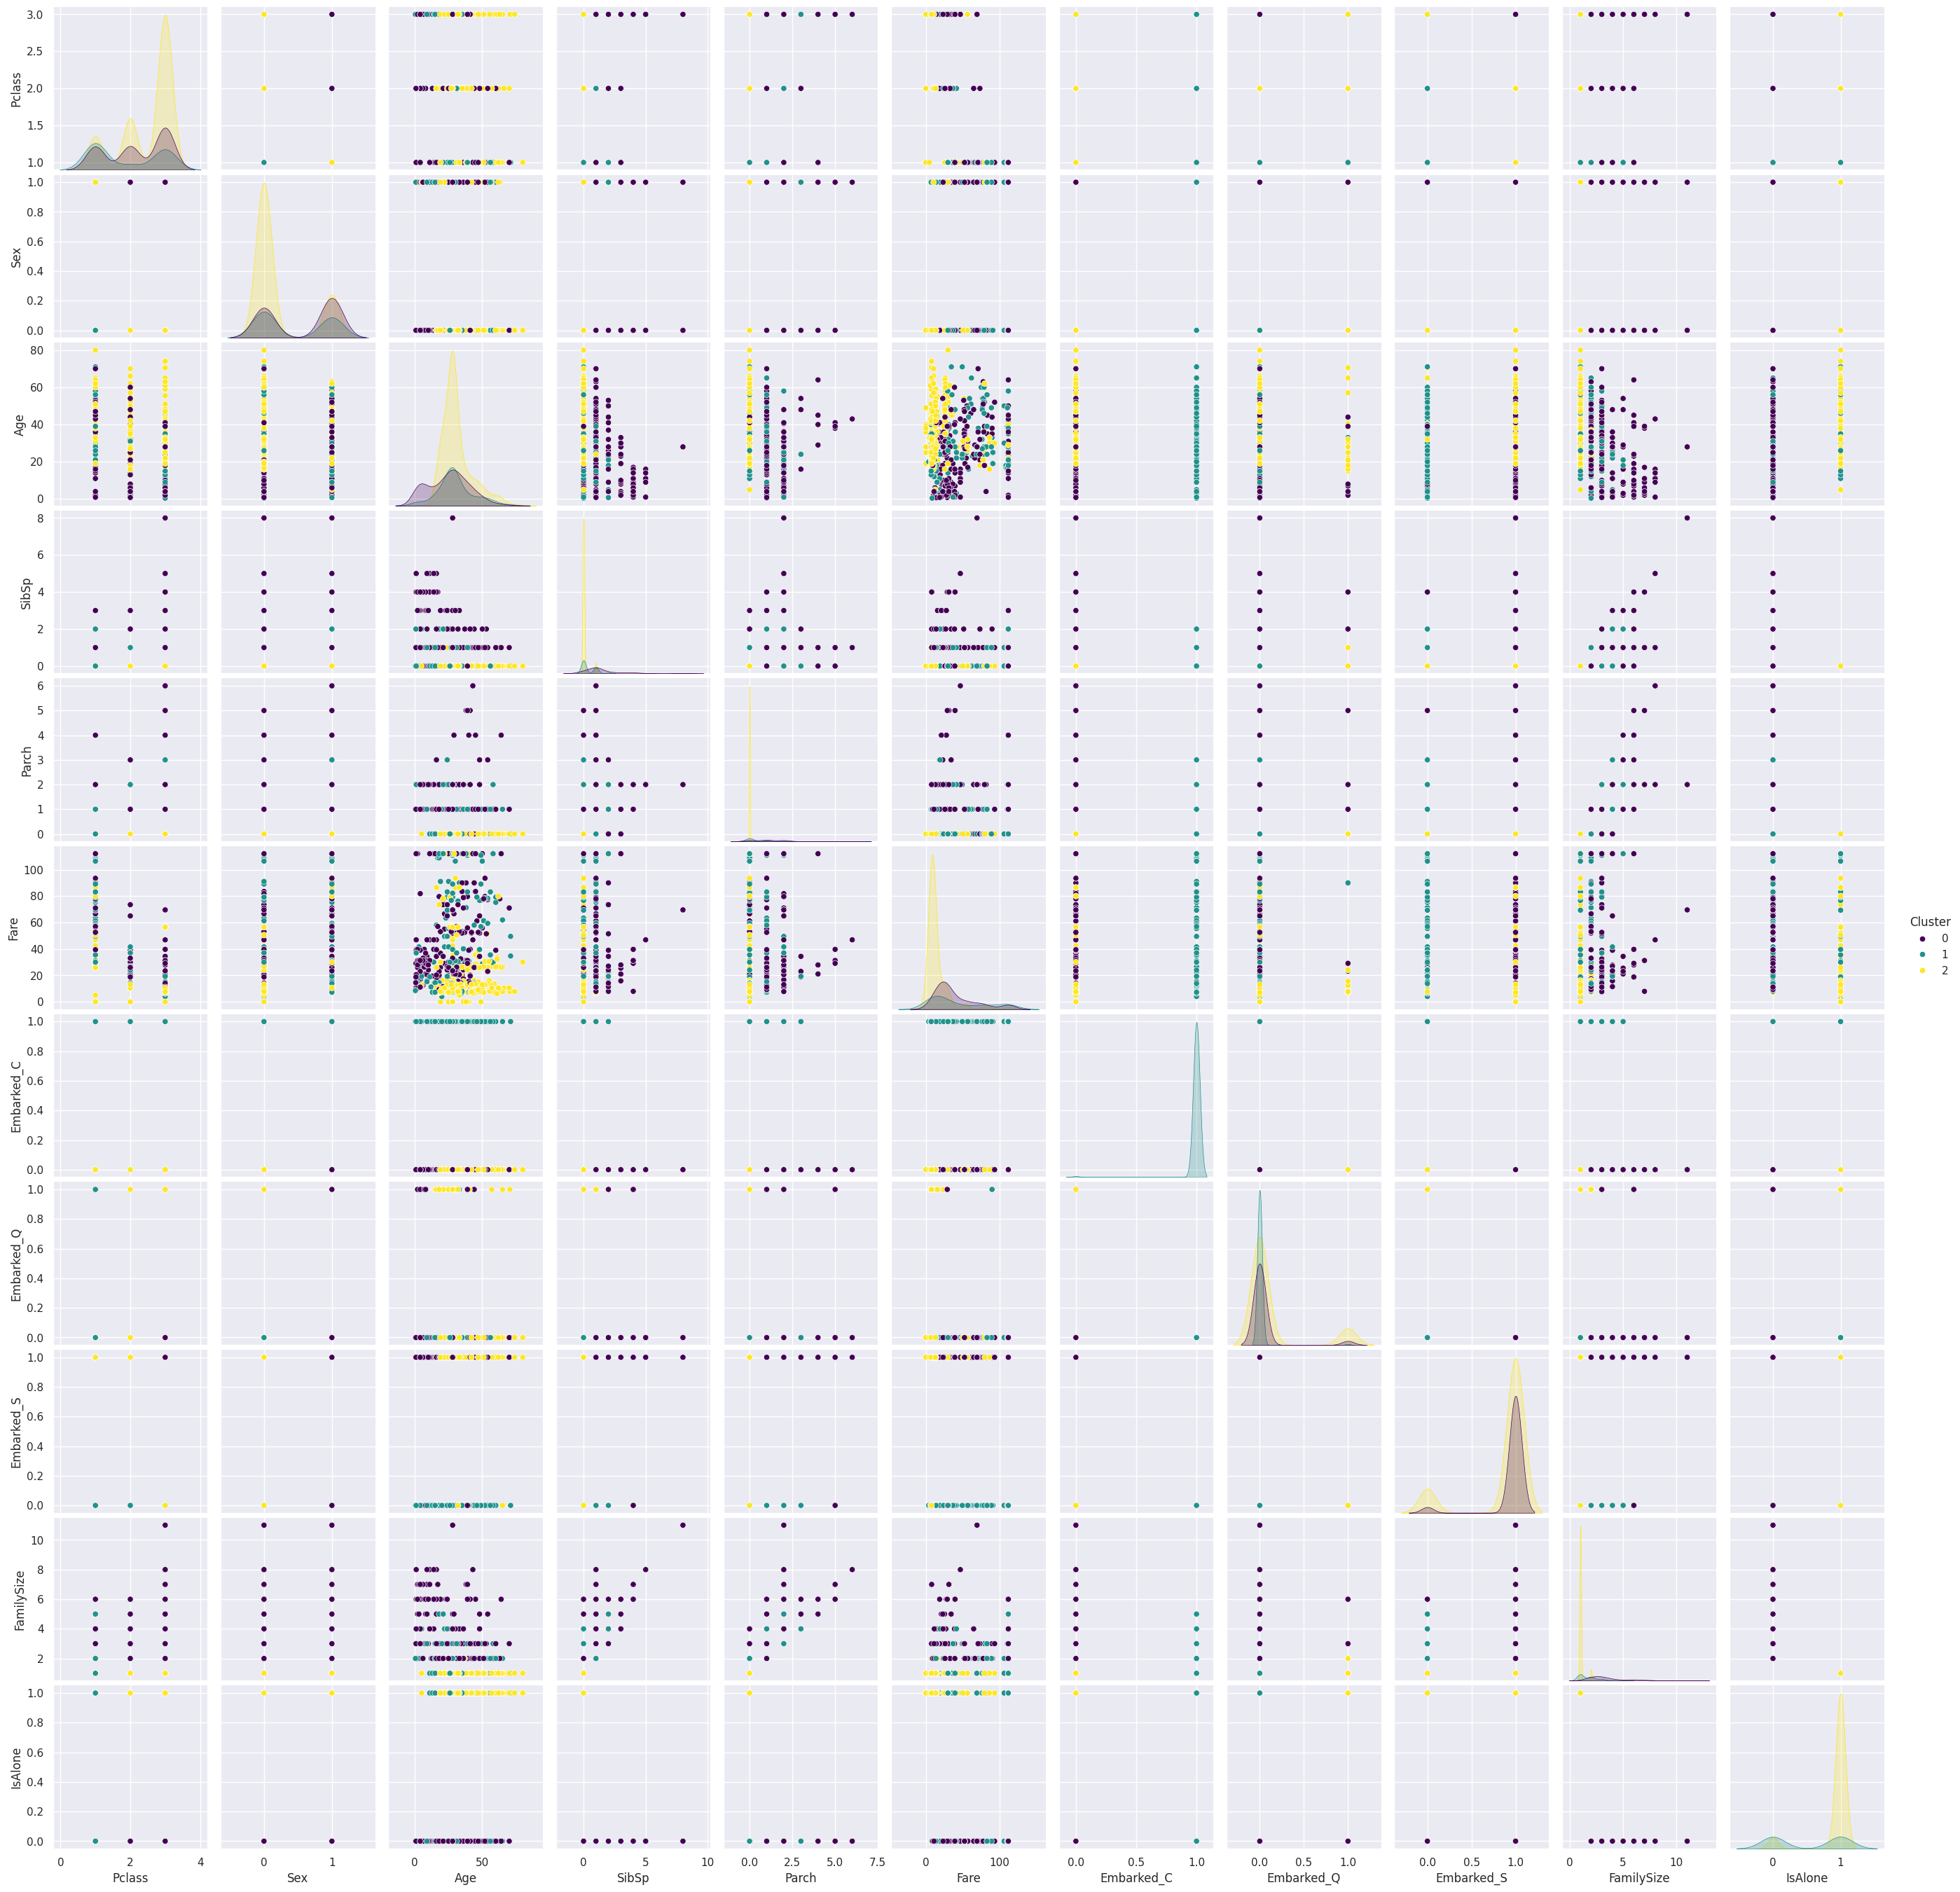

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertia = []
k_range = range(1, 11)  # Check clusters from 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Apply K-Means with an optimal number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
X['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters with a pair plot (or chosen features)
import seaborn as sns
sns.pairplot(X, hue='Cluster', palette='viridis')
plt.show()


Number of anomalies detected: 45


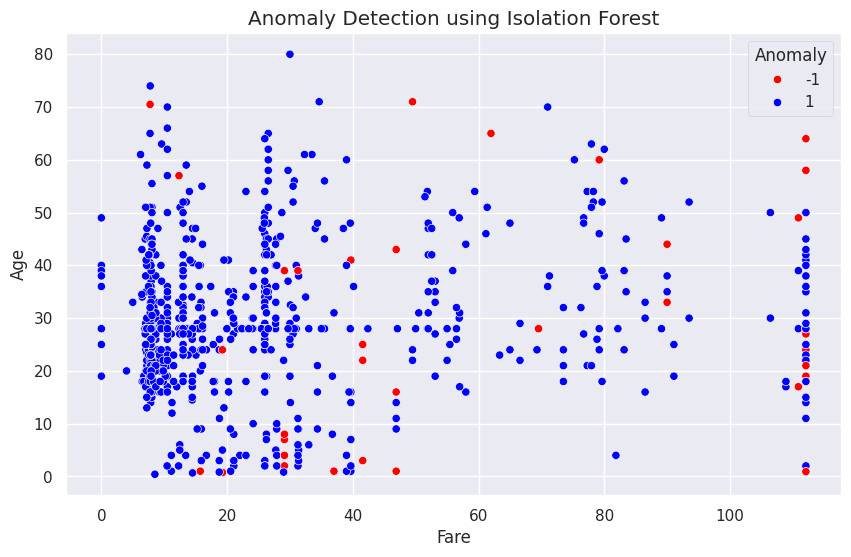

In [33]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination based on expectations
X['Anomaly'] = iso_forest.fit_predict(X_scaled)

# Anomalies are labeled as -1, normal points as 1
anomalies = X[X['Anomaly'] == -1]

# Print the number of anomalies detected
print(f"Number of anomalies detected: {len(anomalies)}")

# Replace 'Feature1' and 'Feature2' with actual column names from your data
sns.scatterplot(x=X['Fare'], y=X['Age'], hue=X['Anomaly'], palette=['red', 'blue'])
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()


#Anomaly Elimination

In [34]:
# Remove anomalies from the dataset
cleaned_data = X[X['Anomaly'] == 1].drop('Anomaly', axis=1)  # Keep only non-anomalous data points
cleaned_target = y.loc[cleaned_data.index]  # Adjust target variable to match the cleaned data

# Print the shape of the cleaned dataset
print("Shape of the cleaned data:", cleaned_data.shape)


Shape of the cleaned data: (846, 12)


#H2O AutoML (Instead of AutoVIML)

In [60]:
!pip install h2o


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=5d8d838169d1a4ec9db298e7d8c8e42f56752f73ec09eddda8ffd7567cc1329c
  Stored in directory: /root/.cache/pip/wheels/0c/95/eb/b449c73f478dbc4557b80170cf7f2aa6db15862877e9a63536
Successfully built h2o


In [62]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
from sklearn.metrics import accuracy_score

# Initialize H2O
h2o.init()

# Convert training and test sets to H2O frames
train_h2o = h2o.H2OFrame(pd.concat([X_train_cleaned, y_train_cleaned], axis=1))
test_h2o = h2o.H2OFrame(X_test_cleaned)

# Specify the target column for H2O
target = 'Survived'
features = X_train_cleaned.columns.tolist()

# Run H2O AutoML
aml = H2OAutoML(max_models=20, seed=42)
aml.train(x=features, y=target, training_frame=train_h2o)

# Predict on the test set
preds = aml.leader.predict(test_h2o)
predictions = preds.as_data_frame().values.flatten()


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,6 mins 59 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,8 days
H2O_cluster_name:,H2O_from_python_unknownUser_6fccys
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.163 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
05:20:56.731: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
05:20:59.752: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
05:21:00.305: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
05:21:01.505: _response param, We have detected that your response column has only 2 uniq

In [63]:
# Convert continuous predictions to binary class labels
binary_predictions = [1 if pred >= 0.5 else 0 for pred in predictions]

# Evaluate the model using binary predictions
print("Accuracy with H2O AutoML Model:", accuracy_score(y_test_cleaned, binary_predictions))


Accuracy with H2O AutoML Model: 0.8
